In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as snb
import tensorflow as tf
from tensorflow import keras
from scipy import stats as st
from scipy.signal  import resample

c:\Users\pveso\anaconda3\envs\ai_dev\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\pveso\anaconda3\envs\ai_dev\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\pveso\anaconda3\envs\ai_dev\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\pveso\anaconda3\envs\ai_dev\lib\site-packages\tensorflow\pyth

In [2]:
# Returns wether PC os is linux or other
def isLinux():
    return os.name == 'posix'

In [3]:
data_filepath = ''

if isLinux():
    pass
else:
    data_filepath = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\vpd_hep_measures.xlsx'

In [5]:
df_excel = pd.read_excel(data_filepath)

In [9]:
df_excel.head()

,pos 0 min 4.89,Unnamed: 1,neg 0min 3.14,Unnamed: 3,pos 4.89,Unnamed: 5,neg 3.31,Unnamed: 7,pos 4.89.1,Unnamed: 9,...,pos 4.6,Unnamed: 33,neg 3.12,Unnamed: 35,pos 4.17,Unnamed: 37,neg 3.13,Unnamed: 39,pos 4.9,Unnamed: 41
0,V,µA,V,µA,V,µA,V,µA,V,µA,...,V,µA,V,µA,V,µA,V,µA,V,µA
1,-0.699948,52.2196,-0.699948,62.282085,-0.699948,64.40711,-0.699948,55.21965,-0.699948,62.282085,...,-0.699948,52.594423,-0.699948,62.094688,-0.699948,61.907291,-0.699948,60.719728,-0.699948,58.219671
2,-0.689948,43.5944,-0.689948,53.157091,-0.689948,55.469513,-0.689948,47.219515,-0.689948,53.781986,...,-0.689948,43.59436,-0.689948,52.594423,-0.689948,55.094481,-0.689948,52.969456,-0.689948,50.406933
3,-0.679948,38.7819,-0.679948,49.21937,-0.679948,52.09446,-0.679948,44.219494,-0.679948,50.657034,...,-0.679948,40.531874,-0.679948,47.96958,-0.679948,52.531958,-0.679948,48.781872,-0.679948,47.469378
4,-0.669948,36.0317,-0.669948,46.906948,-0.669948,49.782038,-0.669948,42.156935,-0.669948,48.594475,...,-0.669948,37.406921,-0.669948,45.969486,-0.669948,52.031994,-0.669948,47.219515,-0.669948,45.219421


In [40]:
potential = df_excel.iloc[1:, 2]
potential_df = potential.astype(np.float32)

In [41]:
potential_df.describe()

count    141.000000
mean       0.000062
std        0.408479
min       -0.699948
25%       -0.349943
50%        0.000062
75%        0.350068
max        0.700073
Name: neg 0min 3.14, dtype: float64

In [56]:
potential_df.describe()

count    141.000000
mean       0.000062
std        0.408479
min       -0.699948
25%       -0.349943
50%        0.000062
75%        0.350068
max        0.700073
Name: neg 0min 3.14, dtype: float64

In [43]:
# Verificando se no dataset temos colunas not a number
df_excel.isna().any().sum()

0

In [44]:
# Verificando se há algum valor null
df_excel.isnull().any().sum()

0

In [83]:
positives = df_excel.iloc[1:,5::4]
negatives = df_excel.iloc[1:, 3::4]

In [84]:
positives.head()

,Unnamed: 5,Unnamed: 9,Unnamed: 13,Unnamed: 17,Unnamed: 21,Unnamed: 25,Unnamed: 29,Unnamed: 33,Unnamed: 37,Unnamed: 41
1,64.40711,62.282085,64.969778,53.03216,52.282095,57.657003,50.15707,52.594423,61.907291,58.219671
2,55.469513,53.781986,60.657263,44.531822,43.469429,47.157049,40.469408,43.59436,55.094481,50.406933
3,52.09446,50.657034,59.157133,41.781902,41.156769,43.031931,37.031889,40.531874,52.531958,47.469378
4,49.782038,48.594475,61.282158,39.531946,38.969278,40.594339,34.281731,37.406921,52.031994,45.219421
5,50.344467,48.407078,64.969778,38.906813,37.969351,39.90674,33.156633,36.844254,53.594589,45.406818


In [85]:
negatives.head()

,Unnamed: 3,Unnamed: 7,Unnamed: 11,Unnamed: 15,Unnamed: 19,Unnamed: 23,Unnamed: 27,Unnamed: 31,Unnamed: 35,Unnamed: 39
1,62.282085,55.21965,59.032202,68.344831,61.782122,63.782215,64.53228,62.844753,62.094688,60.719728
2,53.157091,47.219515,49.719572,59.094667,52.531958,55.094481,60.344696,55.657148,52.594423,52.969456
3,49.21937,44.219494,46.219349,54.969549,49.21937,50.969601,58.594704,50.969601,47.96958,48.781872
4,46.906948,42.156935,44.094324,52.282095,46.531916,48.65694,60.032129,48.719406,45.969486,47.219515
5,46.219349,41.094303,42.594433,51.594496,44.781923,46.594381,63.094616,47.719479,45.844316,45.907021


In [86]:
# Transformando os positivos e negativos em float
positives_df = positives.astype(np.float32)
negatives_df = negatives.astype(np.float32)

In [87]:
positives_df.describe()

,Unnamed: 5,Unnamed: 9,Unnamed: 13,Unnamed: 17,Unnamed: 21,Unnamed: 25,Unnamed: 29,Unnamed: 33,Unnamed: 37,Unnamed: 41
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,57.348587,55.370586,55.955711,47.686943,47.436497,51.489014,46.037643,49.682873,57.120964,53.657890
std,12.202006,11.161823,13.231521,13.436898,14.288779,14.618992,15.399408,15.540482,15.575661,16.222013
min,40.453743,40.209984,37.284946,30.084824,29.247332,34.078644,27.416039,31.372356,39.459969,35.672424
25%,46.860100,45.572567,44.228790,35.641171,35.547424,38.969276,32.628632,36.897446,44.585060,40.572502
50%,55.285217,54.616451,53.753948,45.916321,45.335079,49.485134,45.122551,47.416351,53.416443,49.822639
75%,66.485382,62.360336,64.969780,56.003975,56.297729,58.772778,54.372715,57.454014,65.422867,61.529064
max,86.554459,86.473206,90.523270,85.848190,90.967010,97.910881,92.292046,98.373390,110.498573,110.667328


In [88]:
negatives_df.describe()

,Unnamed: 3,Unnamed: 7,Unnamed: 11,Unnamed: 15,Unnamed: 19,Unnamed: 23,Unnamed: 27,Unnamed: 31,Unnamed: 35,Unnamed: 39
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,54.940765,50.000107,53.841366,59.348785,56.237560,55.570103,57.872967,58.942280,57.096931,56.249943
std,11.761581,13.304927,13.617917,11.098723,12.366553,11.318823,15.140470,14.952596,15.052420,12.598386
min,40.041233,32.053612,36.009933,44.085049,39.109970,40.728737,37.528706,41.522503,38.553715,41.166260
25%,45.285057,38.066196,42.416264,49.991394,45.156956,45.885086,44.278812,47.719479,44.997574,45.907021
50%,52.666428,48.760128,51.841427,57.804012,54.522705,53.735184,55.703972,55.657150,54.691460,53.835201
75%,61.310314,58.522774,61.610317,66.691635,63.391590,62.847828,68.704178,66.160393,64.110352,62.379074
max,94.442055,82.166885,94.660828,89.191986,92.135788,88.779472,100.220200,112.473587,105.679749,98.348381


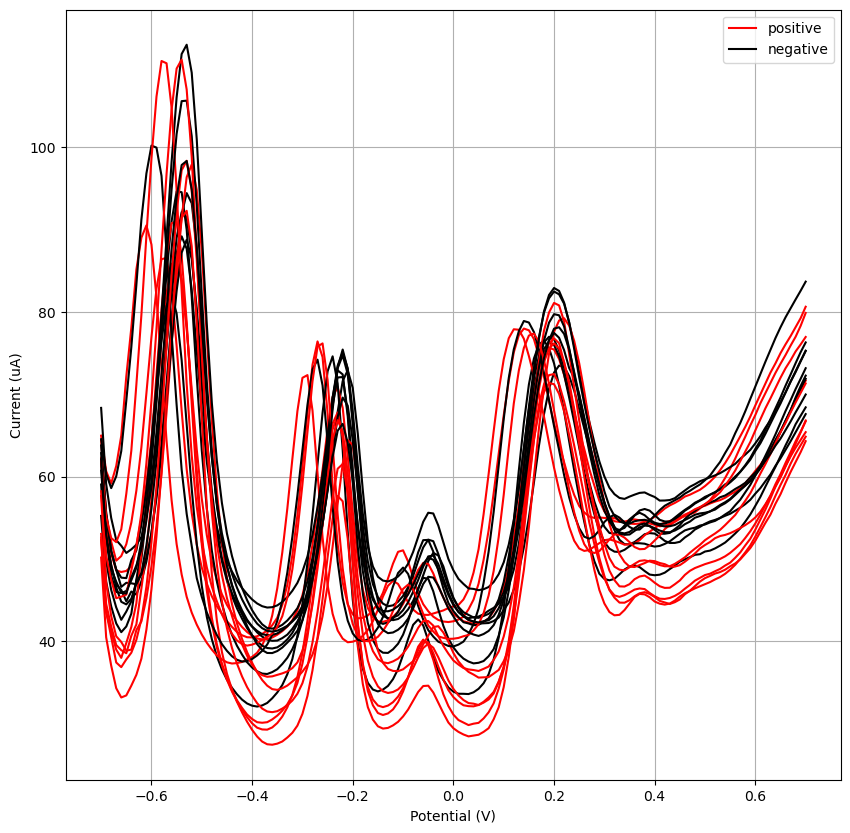

In [89]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [90]:
# Trazendo para a linha de base
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    min_p = positive.min()
    min_n = negative.min()
    positives_df.iloc[:,i] = (positive - min_p)
    negatives_df.iloc[:,i] = (negative - min_n)

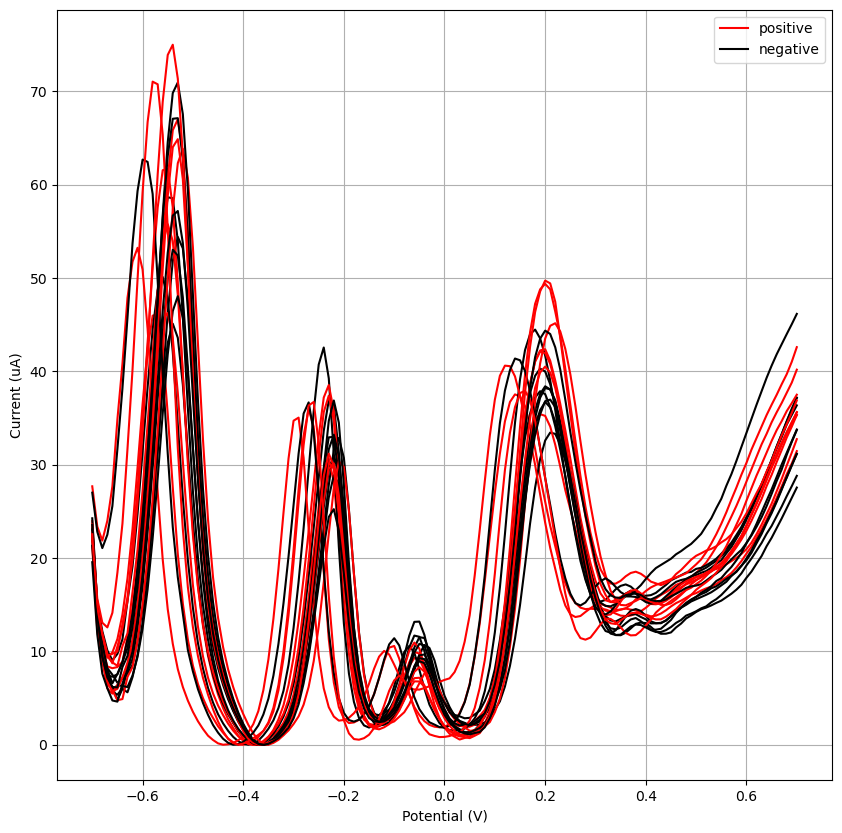

In [91]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [92]:
# Aplicando min max normalization
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    max_p = positive.max()
    min_p = positive.min()
    max_n = negative.max()
    min_n = negative.min()
    positives_df.iloc[:,i] = (positive - min_p) / (max_p - min_p)
    negatives_df.iloc[:,i] = (negative - min_n) / (max_n - min_n)

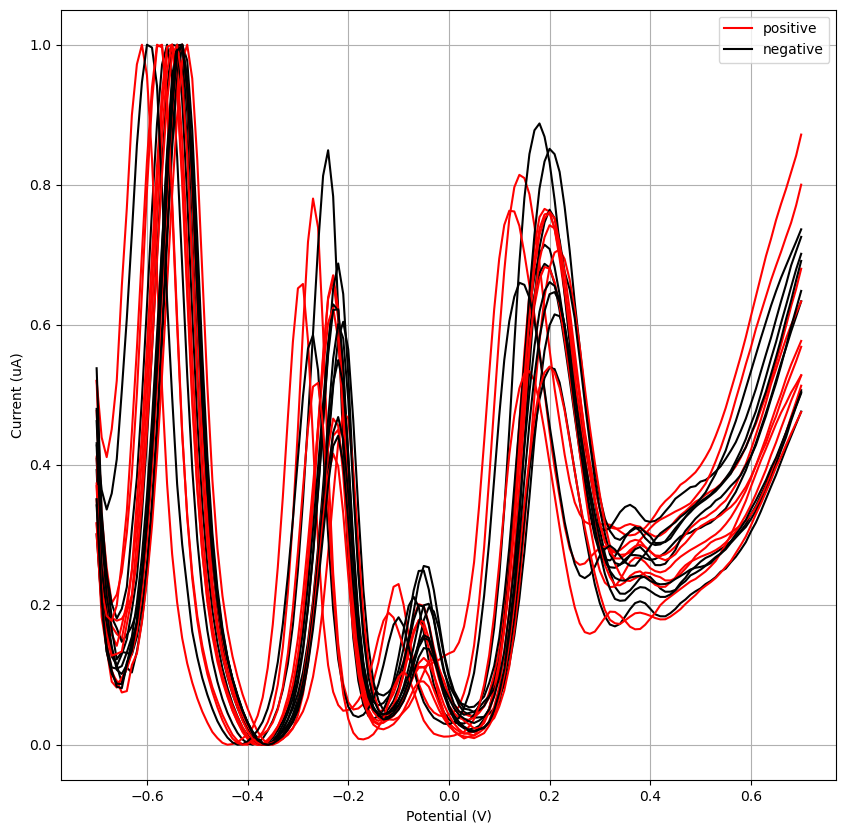

In [93]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [94]:
# Positive = 1
# Negative = 0

Y = np.concatenate((np.zeros(shape = (1, negatives_df.shape[1])), np.ones(shape = (1, positives_df.shape[1]))), axis = 1)
#Y = np.concatenate((np.zeros(shape = (1, currents_virgin.shape[1])), np.ones(shape = (1, currents_rhodamine.shape[1])), np.zeros(shape = (1, emstat_currents_virgin.shape[1])), np.ones(shape = (1, emstat_currents_rhodamine.shape[1]))), axis = 1)
Y = Y.transpose()
Y.shape

(20, 1)

In [95]:
X = np.concatenate((negatives_df, positives_df), axis = 1)
X = X.transpose()
X.shape

(20, 141)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13, 141)
(13, 1)
(7, 141)
(7, 1)


In [116]:
model = tf.keras.Sequential()

# First convolutional layer
model.add(tf.keras.layers.Conv1D(activation='relu', input_shape = (141, 1), kernel_size=5, filters=8, padding='causal'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
# Second convolutional layer
#model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
#model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# Flatten layer to transition from convolutional layers to dense layers
model.add(tf.keras.layers.Flatten())

# Fully connected layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 141, 8)            48        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 70, 8)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 70, 8)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 560)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               71808     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [117]:
model_checkpoint_path = ''
if (isLinux()):
    pass
else:
    model_checkpoint_path = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\src\\Hep'
callback = tf.keras.callbacks.ModelCheckpoint(model_checkpoint_path, monitor='val_acc', save_best_only=True, save_weights_only=True, verbose=1, mode = 'max')

In [118]:
# Reshape the data to fit the 1D CNN input shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
batch_size = 1
epochs = 500

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, callbacks = [callback])

Train on 13 samples, validate on 7 samples
Epoch 1/500
 1/13 [=>............................] - ETA: 1s - loss: 0.6859 - acc: 1.0000
Epoch 00001: val_acc improved from -inf to 0.57143, saving model to C:\Users\pveso\Documents\heart_attack_analysis\src\Hep
13/13 [==============================] - 0s 27ms/sample - loss: 0.6921 - acc: 0.6923 - val_loss: 0.6920 - val_acc: 0.5714
Epoch 2/500
 1/13 [=>............................] - ETA: 0s - loss: 0.6845 - acc: 1.0000
Epoch 00002: val_acc did not improve from 0.57143
13/13 [==============================] - 0s 2ms/sample - loss: 0.6915 - acc: 0.6154 - val_loss: 0.6901 - val_acc: 0.5714
Epoch 3/500
 1/13 [=>............................] - ETA: 0s - loss: 0.7014 - acc: 0.0000e+00
Epoch 00003: val_acc did not improve from 0.57143
13/13 [==============================] - 0s 2ms/sample - loss: 0.6772 - acc: 0.6154 - val_loss: 0.6910 - val_acc: 0.4286
Epoch 4/500
 1/13 [=>............................] - ETA: 0s - loss: 0.6573 - acc: 1.0000
Epoch 

In [119]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_accuracy = history.history['val_acc']

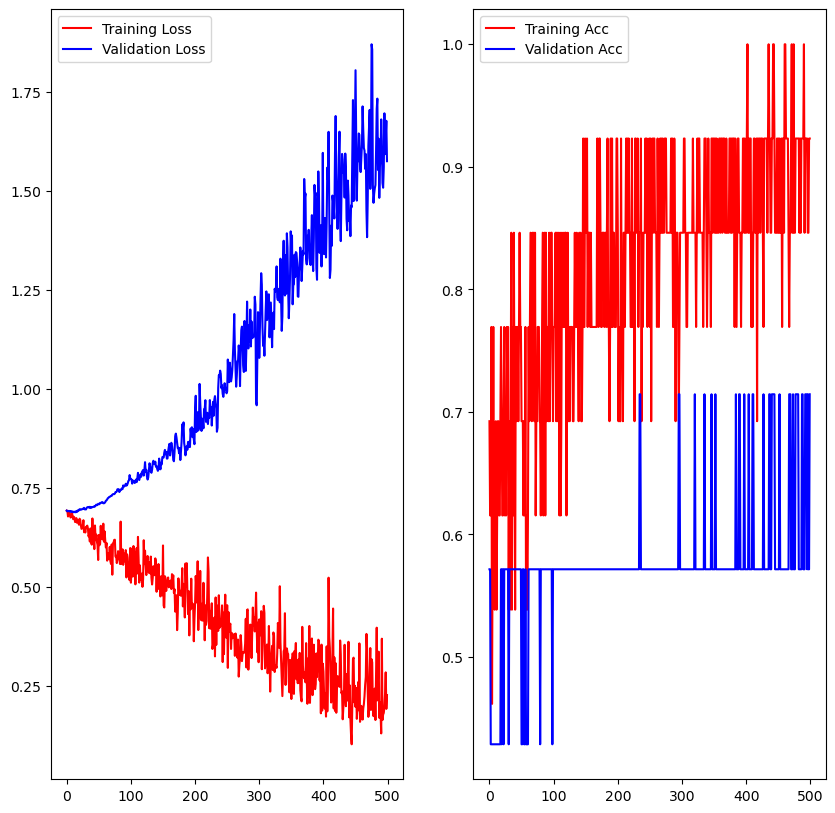

In [120]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (10,10))
ax0.plot(loss, color = 'r', label = 'Training Loss')
ax0.plot(val_loss, color = 'b', label = 'Validation Loss')
ax1.plot(acc, color = 'r', label = 'Training Acc')
ax1.plot(val_accuracy, color = 'b', label = 'Validation Acc')
ax1.legend()
ax0.legend()
plt.show()

In [121]:
# Matriz confusão
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, roc_curve, auc
model.load_weights(model_checkpoint_path)
y_pred = model.predict(X_test)
y_pred = y_pred >= 0.5
cm = confusion_matrix(y_test, y_pred)

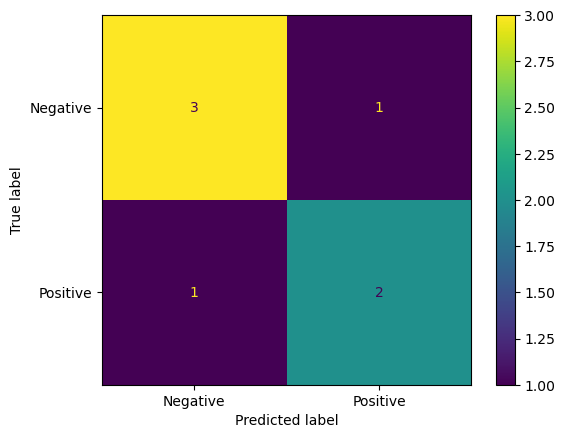

In [122]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive']).plot()

In [123]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.6666666666666666
0.7142857142857143


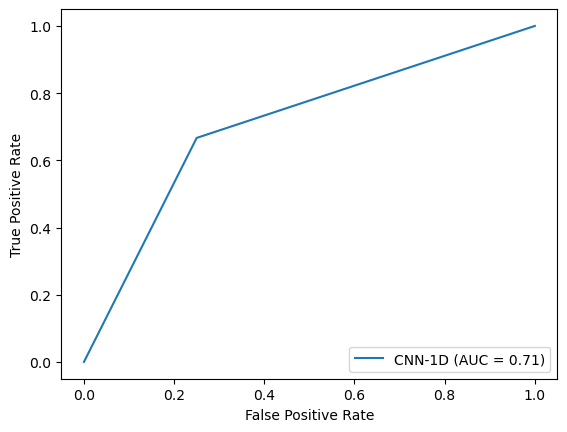

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='CNN-1D')
display.plot()
plt.show()